<a href="https://colab.research.google.com/github/YacineF14/first-project/blob/main/Bienvenue_dans_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 تدريب النموذج ...
✅ تم التدريب


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


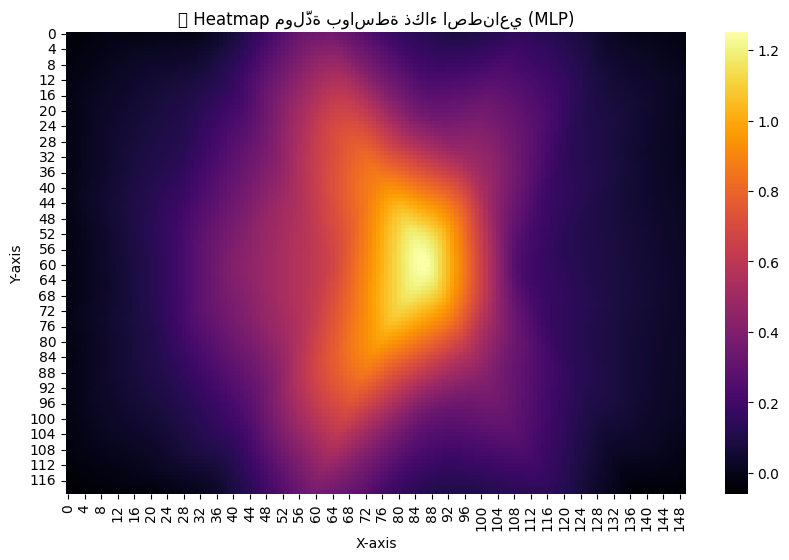

In [8]:
# ==========================================
# 🔥 توليد بيانات اصطناعية + رسم Heatmap ذكية
# ==========================================

# تثبيت المكتبات الأساسية
!pip install -q seaborn scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor

# 1️⃣ توليد بيانات اصطناعية (x, y, value)
# الفكرة: نولد شبكة إحداثيات ونحسب قيمة تعتمد على معادلة "حرارية" + ضجيج عشوائي

nx, ny = 50, 40                # عدد النقاط في الاتجاهين
x = np.linspace(-3, 3, nx)
y = np.linspace(-2, 2, ny)
xv, yv = np.meshgrid(x, y)

# نصنع "سطح حراري" وهمي
values = np.exp(-((xv**2)/2 + (yv**2)/3)) * (1 + 0.5*np.sin(3*xv)*np.cos(2*yv))
values += 0.05 * np.random.randn(*values.shape)  # نضيف شوية ضجيج

# نحولها لجدول تعلم آلي
X = np.column_stack([xv.ravel(), yv.ravel()])
y_true = values.ravel()

# 2️⃣ ندرب شبكة عصبية صغيرة (MLP) تتعلم الشكل الحراري
model = MLPRegressor(hidden_layer_sizes=(128, 64),
                     activation='relu',
                     solver='adam',
                     learning_rate_init=0.001,
                     max_iter=1000,
                     random_state=42)
print("🚀 تدريب النموذج ...")
model.fit(X, y_true)
print("✅ تم التدريب")

# 3️⃣ نولد شبكة أدق ونطلب من الموديل يتنبأ بالقيم الجديدة (كأنه يرسم الخريطة بنفسه)
nx_new, ny_new = 150, 120
x_new = np.linspace(-3, 3, nx_new)
y_new = np.linspace(-2, 2, ny_new)
xv_new, yv_new = np.meshgrid(x_new, y_new)
X_new = np.column_stack([xv_new.ravel(), yv_new.ravel()])
y_pred = model.predict(X_new)
heatmap = y_pred.reshape(ny_new, nx_new)

# 4️⃣ رسم الخريطة الحرارية الجميلة
plt.figure(figsize=(10,6))
sns.heatmap(heatmap, cmap='inferno', cbar=True)
plt.title("🧠 Heatmap مولّدة بواسطة ذكاء اصطناعي (MLP)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
